<a href="https://colab.research.google.com/github/Renata-Thomazelli/mentoria2021/blob/main/wheat_exportation_thousand_tonnes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Analysing the wheat exports***

---

In [ ]:
# Importing Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing 
import pandas as pd
import numpy as np
import chardet
import missingno as msno
import matplotlib.pyplot as plt

%matplotlib inline

Install knoema

In [ ]:
pip install knoema

In [ ]:
import knoema

In [ ]:
paises_exportadores = knoema.get('USDAPSD2021May25', frequency='A', Country='China;India;Russia;United States;Canada;Australia;United Kingdom;Germany;France;Brazil;Egypt;Indonesia;Philippines;Turkey', Commodity='0410000', Attribute='088')



**Alemanha e França não constam na lista de países exportadores**

In [ ]:
paises_exportadores

Country,Australia,Brazil,Canada,China,Egypt,India,Indonesia,Philippines,Russia,Turkey,United Kingdom,United States
Commodity,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat
Attribute,Exports,Exports,Exports,Exports,Exports,Exports,Exports,Exports,Exports,Exports,Exports,Exports
Frequency,A,A,A,A,A,A,A,A,A,A,A,A
1960-01-01,6456.0,0.0,9614.0,2.0,5.0,0.0,0.0,0.0,NaN,1.0,NaN,17799.0
1961-01-01,4950.0,0.0,9744.0,122.0,6.0,0.0,0.0,0.0,NaN,1.0,NaN,19486.0
1962-01-01,6148.0,0.0,9018.0,89.0,15.0,0.0,0.0,0.0,NaN,0.0,NaN,17663.0
1963-01-01,6986.0,0.0,16181.0,113.0,19.0,0.0,0.0,0.0,NaN,0.0,NaN,23024.0
1964-01-01,7321.0,0.0,10875.0,115.0,12.0,0.0,0.0,0.0,NaN,0.0,NaN,19677.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-01,13849.0,230.0,22000.0,1004.0,781.0,569.0,318.0,60.0,41447.0,6698.0,795.0,24658.0


In [ ]:

paises_exportadores.to_csv("paises_exportadores.csv")

## Reading CSV

---

In [ ]:

file_path ='/content/drive/MyDrive/Data_Lake/wheat_exportation/'
file = 'paises_exportadores.csv'

Reading encoding

In [ ]:
with open(f"{file_path}{file}", 'rb') as encoding:
    r_encoding = chardet.detect(encoding.read(100000))
r_encoding

{'confidence': 1.0, 'encoding': 'ascii', 'language': ''}

Reading CSV

In [ ]:
with open (f"{file_path}{file}",'r',encoding=r_encoding['encoding']) as countries:
  df_countries_exportadores = pd.read_csv(countries)


# Dataframe

In [ ]:
df_countries_exportadores

,Country,Australia,Brazil,Canada,China,Egypt,India,Indonesia,Philippines,Russia,Turkey,United Kingdom,United States
0,Commodity,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat
1,Attribute,Exports,Exports,Exports,Exports,Exports,Exports,Exports,Exports,Exports,Exports,Exports,Exports
2,Frequency,A,A,A,A,A,A,A,A,A,A,A,A
3,1960-01-01,6456.0,0.0,9614.0,2.0,5.0,0.0,0.0,0.0,NaN,1.0,NaN,17799.0
4,1961-01-01,4950.0,0.0,9744.0,122.0,6.0,0.0,0.0,0.0,NaN,1.0,NaN,19486.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2017-01-01,13849.0,230.0,22000.0,1004.0,781.0,569.0,318.0,60.0,41447.0,6698.0,795.0,24658.0
61,2018-01-01,9006.0,602.0,24380.0,1006.0,1090.0,496.0,274.0,71.0,35863.0,6814.0,738.0,25502.0
62,2019-01-01,9136.0,420.0,24627.0,1049.0,978.0,509.0,350.0,75.0,34485.0,6534.0,1621.0,26276.0
63,2020-01-01,22000.0,950.0,27500.0,1000.0,900.0,2300.0,300.0,65.0,39500.0,6600.0,350.0,26263.0


## <font color = "green"> *Renomeando colunas e removendo níveis desnecessários*
___



In [ ]:
#function to rename index values
def replace (col): 
    return col.replace("-01-01",'')

In [ ]:
# checking the shape
df_countries_exportadores.shape

(65, 13)

In [ ]:
#renaming colomns, drops levels and setting index
anos = {"Country":"Years"}
df_countries_exportadores=\
(
    df_countries_exportadores.drop(range(0,3))
    .rename(columns=anos)
    .set_index("Years")
    .rename(index=replace)
 )


In [ ]:
#Veryfing new shape
df_countries_exportadores.shape

(62, 12)

In [ ]:
df_countries_exportadores

,Australia,Brazil,Canada,China,Egypt,India,Indonesia,Philippines,Russia,Turkey,United Kingdom,United States
Years,,,,,,,,,,,,
1960,6456.0,0.0,9614.0,2.0,5.0,0.0,0.0,0.0,NaN,1.0,NaN,17799.0
1961,4950.0,0.0,9744.0,122.0,6.0,0.0,0.0,0.0,NaN,1.0,NaN,19486.0
1962,6148.0,0.0,9018.0,89.0,15.0,0.0,0.0,0.0,NaN,0.0,NaN,17663.0
1963,6986.0,0.0,16181.0,113.0,19.0,0.0,0.0,0.0,NaN,0.0,NaN,23024.0
1964,7321.0,0.0,10875.0,115.0,12.0,0.0,0.0,0.0,NaN,0.0,NaN,19677.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,13849.0,230.0,22000.0,1004.0,781.0,569.0,318.0,60.0,41447.0,6698.0,795.0,24658.0
2018,9006.0,602.0,24380.0,1006.0,1090.0,496.0,274.0,71.0,35863.0,6814.0,738.0,25502.0
2019,9136.0,420.0,24627.0,1049.0,978.0,509.0,350.0,75.0,34485.0,6534.0,1621.0,26276.0


Identificando valores NAN

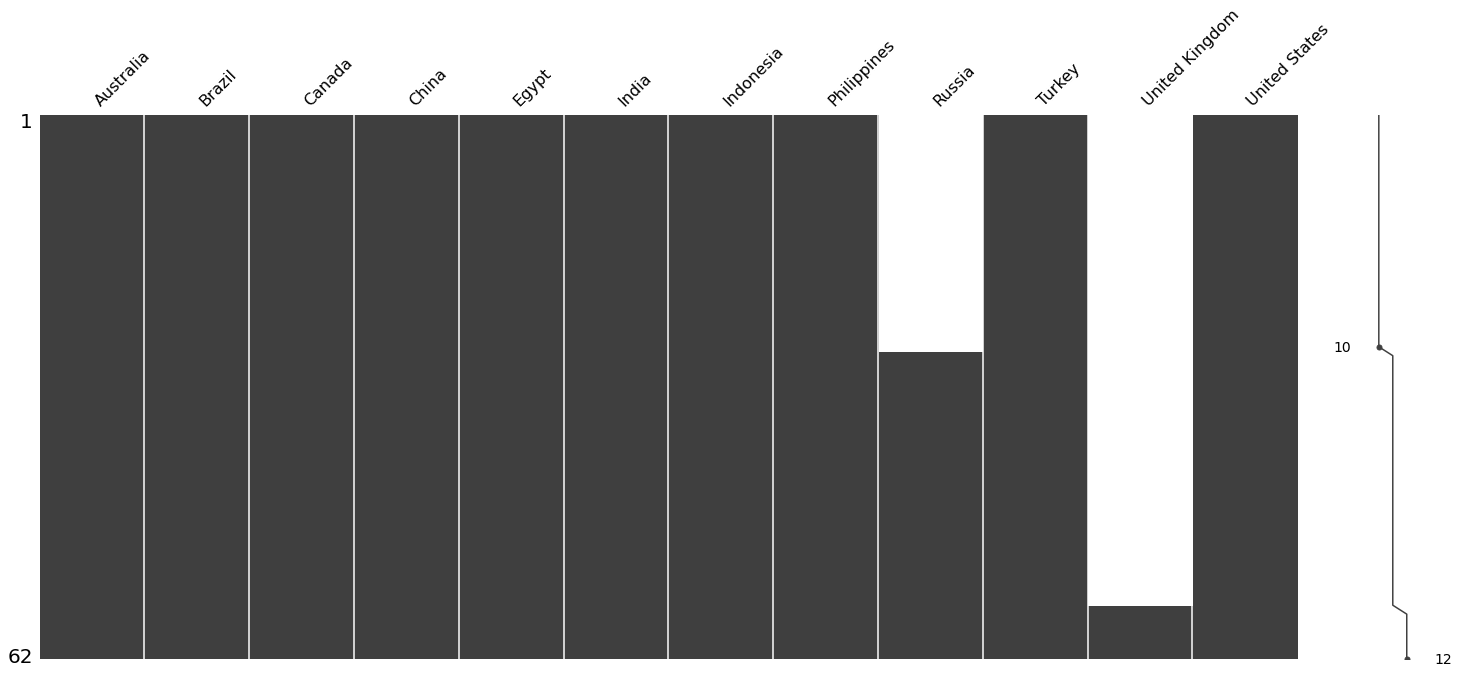

In [ ]:
#Verifing new NAN values
msno.matrix(df_countries_exportadores)

In [ ]:
df_countries_exportadores.isna().sum()

Australia          0
Brazil             0
Canada             0
China              0
Egypt              0
India              0
Indonesia          0
Philippines        0
Russia            27
Turkey             0
United Kingdom    56
United States      0
dtype: int64

In [ ]:
#fillna and changing types
df_countries_exportadores =\
(
    df_countries_exportadores.fillna(0)
    .astype(float)
    .astype(int)
   
)



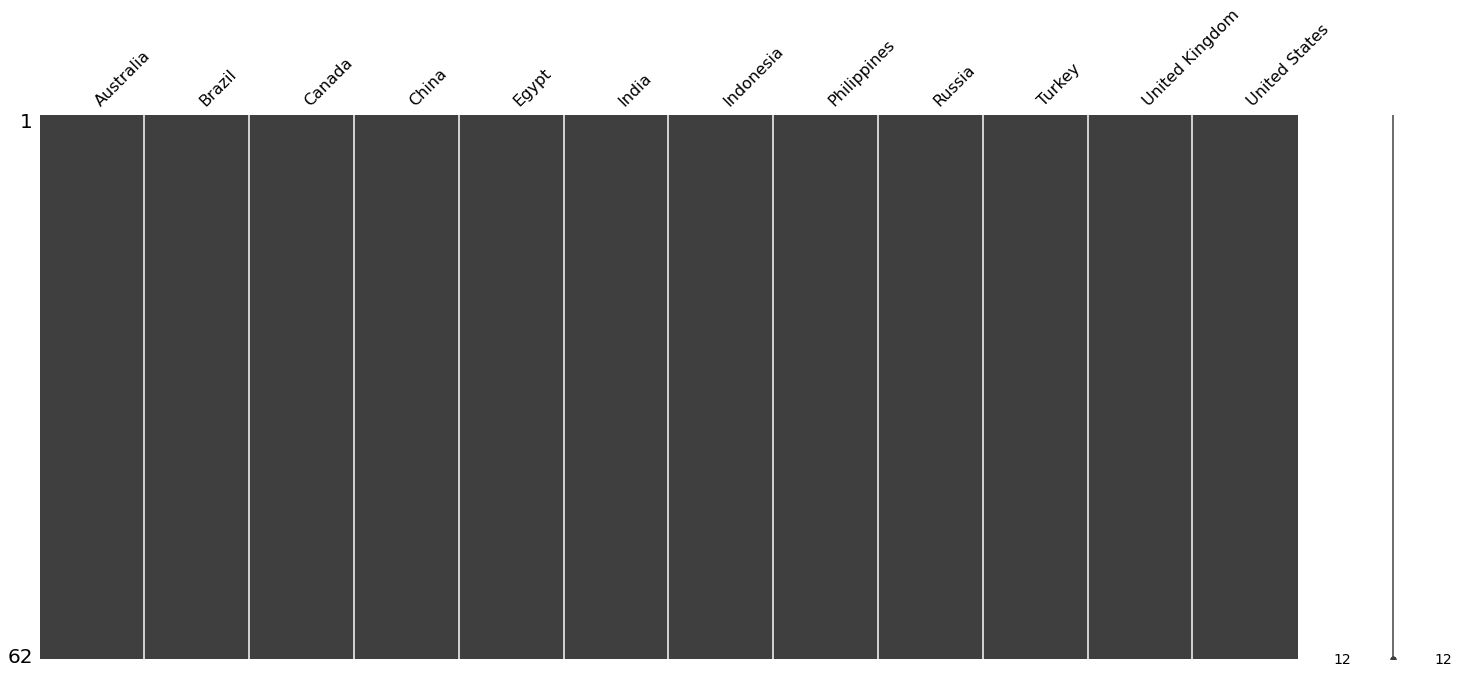

In [ ]:
#No NAN
msno.matrix(df_countries_exportadores)

In [ ]:
df_countries_exportadores

,Australia,Brazil,Canada,China,Egypt,India,Indonesia,Philippines,Russia,Turkey,United Kingdom,United States
Years,,,,,,,,,,,,
1960,6456,0,9614,2,5,0,0,0,0,1,0,17799
1961,4950,0,9744,122,6,0,0,0,0,1,0,19486
1962,6148,0,9018,89,15,0,0,0,0,0,0,17663
1963,6986,0,16181,113,19,0,0,0,0,0,0,23024
1964,7321,0,10875,115,12,0,0,0,0,0,0,19677
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,13849,230,22000,1004,781,569,318,60,41447,6698,795,24658
2018,9006,602,24380,1006,1090,496,274,71,35863,6814,738,25502
2019,9136,420,24627,1049,978,509,350,75,34485,6534,1621,26276


In [73]:
#replacing name for ISO3 cod
iso3 = {'Australia' :"AUS", 'Brazil':"BRA", 'Canada':"CAN", 'China':"CHN", 'Egypt':"EGY", 'India':"IND", 'Indonesia':"IDN",
       'Philippines':"PHL", 'Russia':"RUS", 'Turkey':"TUR", 'United Kingdom':"GBR", 'United States':"USA"}

       

In [75]:
df_countries_exportadores_iso3=df_countries_exportadores.rename(columns=iso3)
df_countries_exportadores_iso3.head()

,AUS,BRA,CAN,CHN,EGY,IND,IDN,PHL,RUS,TUR,GBR,USA
Years,,,,,,,,,,,,
1960,6456,0,9614,2,5,0,0,0,0,1,0,17799
1961,4950,0,9744,122,6,0,0,0,0,1,0,19486
1962,6148,0,9018,89,15,0,0,0,0,0,0,17663
1963,6986,0,16181,113,19,0,0,0,0,0,0,23024
1964,7321,0,10875,115,12,0,0,0,0,0,0,19677


In [76]:
#checking the usage
df_countries_exportadores_iso3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 1960 to 2021
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AUS     62 non-null     int64
 1   BRA     62 non-null     int64
 2   CAN     62 non-null     int64
 3   CHN     62 non-null     int64
 4   EGY     62 non-null     int64
 5   IND     62 non-null     int64
 6   IDN     62 non-null     int64
 7   PHL     62 non-null     int64
 8   RUS     62 non-null     int64
 9   TUR     62 non-null     int64
 10  GBR     62 non-null     int64
 11  USA     62 non-null     int64
dtypes: int64(12)
memory usage: 8.8+ KB


*DADOS ESTATÍSTICOS*

In [77]:
estatistica = \
(
    df_countries_exportadores_iso3.describe(include=[np.number])
    .T
    .astype(int)
    .sort_values('max',ascending=False)

)
estatistica

,count,mean,std,min,25%,50%,75%,max
USA,62,28539,7032,14805,24071,28017,32964,48191
RUS,62,6987,11842,0,0,587,10758,41447
CAN,62,17041,4670,8323,13788,16730,20197,27500
AUS,62,12092,4951,4281,8059,11151,15991,24661
IND,62,839,1545,0,2,100,676,6824
TUR,62,1804,2155,0,52,950,2342,6814
CHN,62,533,707,0,4,118,962,2835
BRA,62,281,568,0,0,0,192,2535
GBR,62,94,339,0,0,0,0,1828
EGY,62,116,264,0,0,3,27,1090


In [78]:
df_countries_exportadores_iso3.sort_index(ascending = False)


,AUS,BRA,CAN,CHN,EGY,IND,IDN,PHL,RUS,TUR,GBR,USA
Years,,,,,,,,,,,,
2021,20000,1000,23500,1000,900,2200,300,70,40000,6500,550,24494
2020,22000,950,27500,1000,900,2300,300,65,39500,6600,350,26263
2019,9136,420,24627,1049,978,509,350,75,34485,6534,1621,26276
2018,9006,602,24380,1006,1090,496,274,71,35863,6814,738,25502
2017,13849,230,22000,1004,781,569,318,60,41447,6698,795,24658
...,...,...,...,...,...,...,...,...,...,...,...,...
1964,7321,0,10875,115,12,0,0,0,0,0,0,19677
1963,6986,0,16181,113,19,0,0,0,0,0,0,23024
1962,6148,0,9018,89,15,0,0,0,0,0,0,17663


In [ ]:
col = df_countries_exportadores.columns
col

Index(['Australia', 'Brazil', 'Canada', 'China', 'Egypt', 'India', 'Indonesia',
       'Philippines', 'Russia', 'Turkey', 'United Kingdom', 'United States'],
      dtype='object')

In [ ]:
path_to_charts='/content/drive/MyDrive/Trigo_analises/charts/'

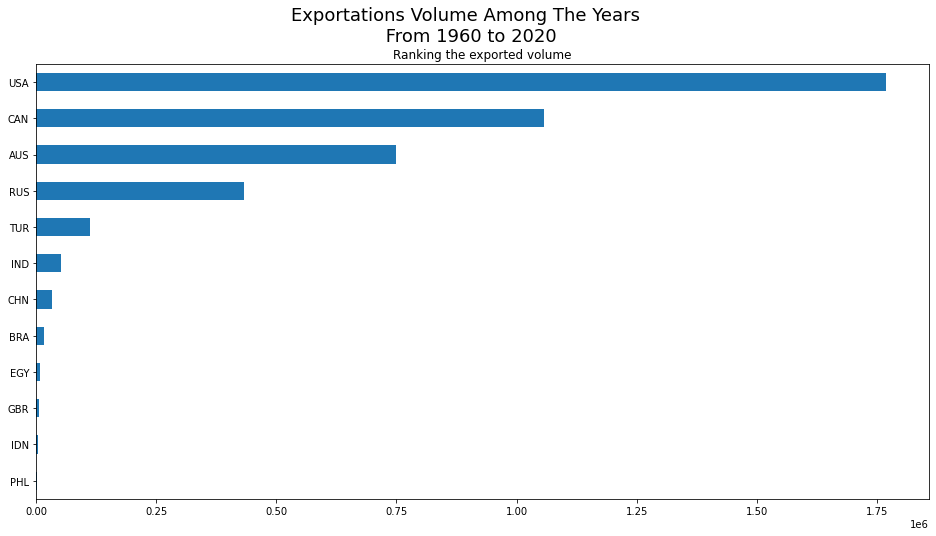

In [79]:
fig, ax_array = plt.subplots(1,1, figsize = (16,8))
ax1= ax_array
fig.suptitle("Exportations Volume Among The Years \n From 1960 to 2020", size=18)
ex_1 = df_countries_exportadores_iso3.sum().sort_values(ascending= True)
ex_1.plot.barh(ax=ax1, title= "Ranking the exported volume")
fig.savefig(f'{path_to_charts}Exportations Volume Among The Years From 1960 to 2020.png', dpi=300,)
                                             


In [80]:
df_countries_exportadores_iso3.sum().sort_values(ascending= False)

USA    1769431
CAN    1056586
AUS     749738
RUS     433238
TUR     111857
IND      52074
CHN      33092
BRA      17432
EGY       7202
GBR       5882
IDN       4951
PHL        914
dtype: int64

In [81]:
df_countries_exportadores_iso3.reset_index()

,Years,AUS,BRA,CAN,CHN,EGY,IND,IDN,PHL,RUS,TUR,GBR,USA
0,1960,6456,0,9614,2,5,0,0,0,0,1,0,17799
1,1961,4950,0,9744,122,6,0,0,0,0,1,0,19486
2,1962,6148,0,9018,89,15,0,0,0,0,0,0,17663
3,1963,6986,0,16181,113,19,0,0,0,0,0,0,23024
4,1964,7321,0,10875,115,12,0,0,0,0,0,0,19677
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2017,13849,230,22000,1004,781,569,318,60,41447,6698,795,24658
58,2018,9006,602,24380,1006,1090,496,274,71,35863,6814,738,25502
59,2019,9136,420,24627,1049,978,509,350,75,34485,6534,1621,26276
60,2020,22000,950,27500,1000,900,2300,300,65,39500,6600,350,26263


## ***The Top exporter of each Year***

In [82]:
tops_for_year_exportadores=\
(
    df_countries_exportadores_iso3.reset_index()
    .melt(id_vars = ["Years"],var_name="Countries",value_name = "Exportation")
    .sort_values("Exportation", ascending= False)
    .drop_duplicates(subset="Years")
    .set_index("Years")
)
tops_for_year_exportadores

,Countries,Exportation
Years,,
1981,USA,48191
1987,USA,43215
2017,RUS,41447
1980,USA,41200
1982,USA,41058
...,...,...
1960,USA,17799
1962,USA,17663
1969,USA,16411


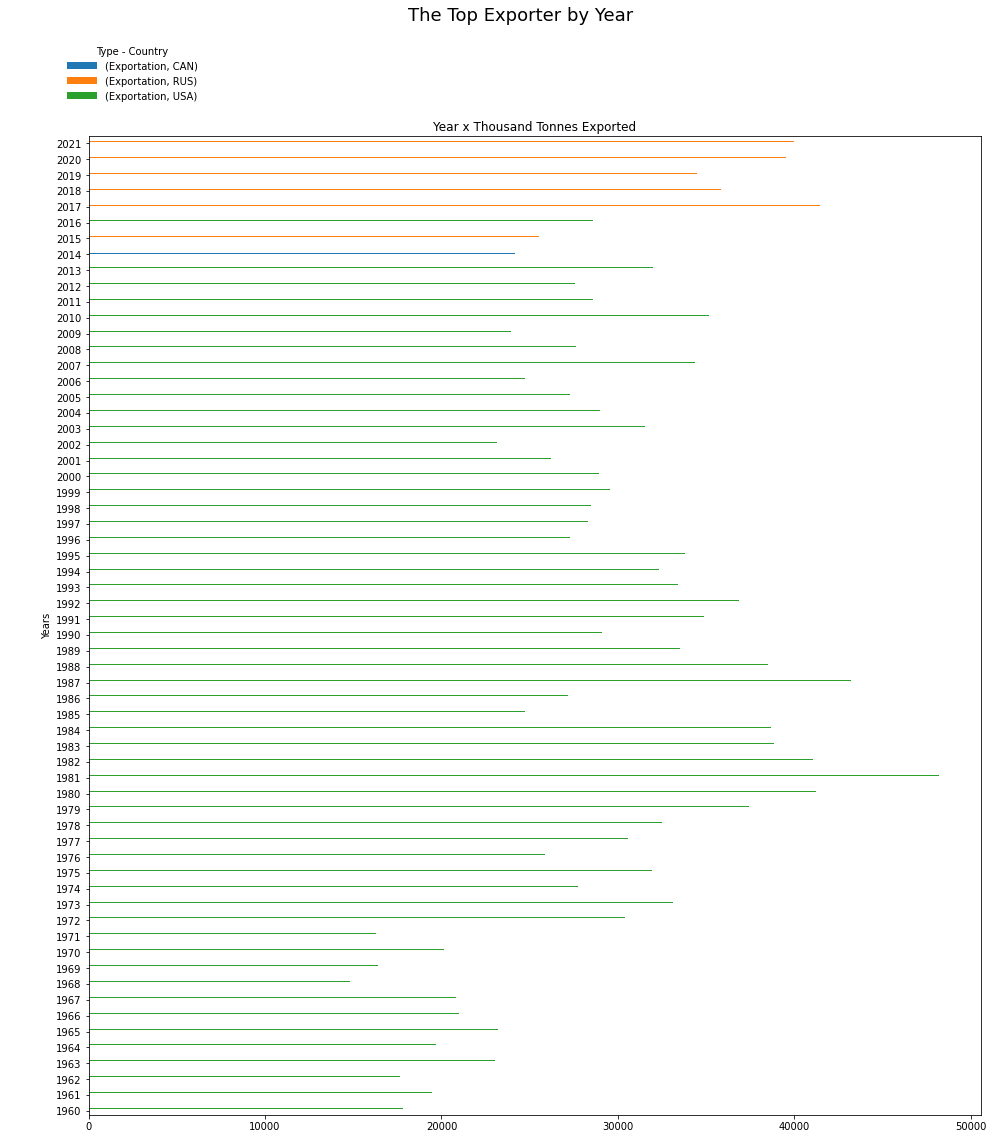

In [84]:
#Plotting the Biggest exporter by Year
fig, ax_array2 = plt.subplots(1,1, figsize = (16,18))
ax2= ax_array2
fig.suptitle("The Top Exporter by Year", size=18)
ex_2 = tops_for_year_exportadores.pivot(columns= 'Countries')
ex_2.plot.barh(ax=ax2, title= "Year x Thousand Tonnes Exported",legend=False,width=0.19, align='edge')
ax2.figure.legend(framealpha=1, frameon=False, title ="Type - Country", handlelength=3.0, handletextpad= 0.8,loc='upper left',bbox_to_anchor=(0.05, 0.85))
fig.savefig(f"{path_to_charts}The Top Exporter by Year.png",dpi=300)


## **The last-placed exporter at each year**

Identificando os zeros e eliminando-os para que não ocorra empate nos últimos lugares

In [85]:
counting_zeros= (df_countries_exportadores_iso3.reset_index().eq(0).sum())
counting_zeros

Years     0
AUS       0
BRA      32
CAN       0
CHN      11
EGY      28
IND      15
IDN      30
PHL      40
RUS      27
TUR      10
GBR      56
USA       0
dtype: int64

In [86]:
counting_no_zeros=df_countries_exportadores_iso3.reset_index().astype(bool).sum(axis=0)
counting_no_zeros



Years    62
AUS      62
BRA      30
CAN      62
CHN      51
EGY      34
IND      47
IDN      32
PHL      22
RUS      35
TUR      52
GBR       6
USA      62
dtype: int64

In [87]:
lista =[]

for i,v in counting_no_zeros.iteritems():
  if v !=0:
    lista.append(i)


print(lista)


['Years', 'AUS', 'BRA', 'CAN', 'CHN', 'EGY', 'IND', 'IDN', 'PHL', 'RUS', 'TUR', 'GBR', 'USA']


In [92]:
last_for_years_exportadores=\
(
    #dataframe original
    df_countries_exportadores_iso3.reset_index()
    #filtering years and countries that have no zero in the entire column
    .filter(items=lista)
    #unpivoting
    .melt(id_vars = ["Years"],var_name="Countries",value_name = "Exportation")
    #sorting_values
    .sort_values(["Years","Exportation"], ascending= [False,True])
  )
    
last_for_years_exportadores

                




,Years,Countries,Exportation
495,2021,PHL,70
433,2021,IDN,300
681,2021,GBR,550
309,2021,EGY,900
123,2021,BRA,1000
...,...,...,...
186,1960,CHN,2
248,1960,EGY,5
0,1960,AUS,6456
124,1960,CAN,9614


In [93]:
last_for_years_exportadores=\
(
    last_for_years_exportadores.loc[last_for_years_exportadores["Exportation"]>0,:]
    #drop duplicates
    .drop_duplicates(subset="Years")
    #setting the index
    .set_index("Years")

)

last_for_years_exportadores

,Countries,Exportation
Years,,
2021,PHL,70
2020,PHL,65
2019,PHL,75
2018,PHL,71
2017,PHL,60
...,...,...
1964,EGY,12
1963,EGY,19
1962,EGY,15


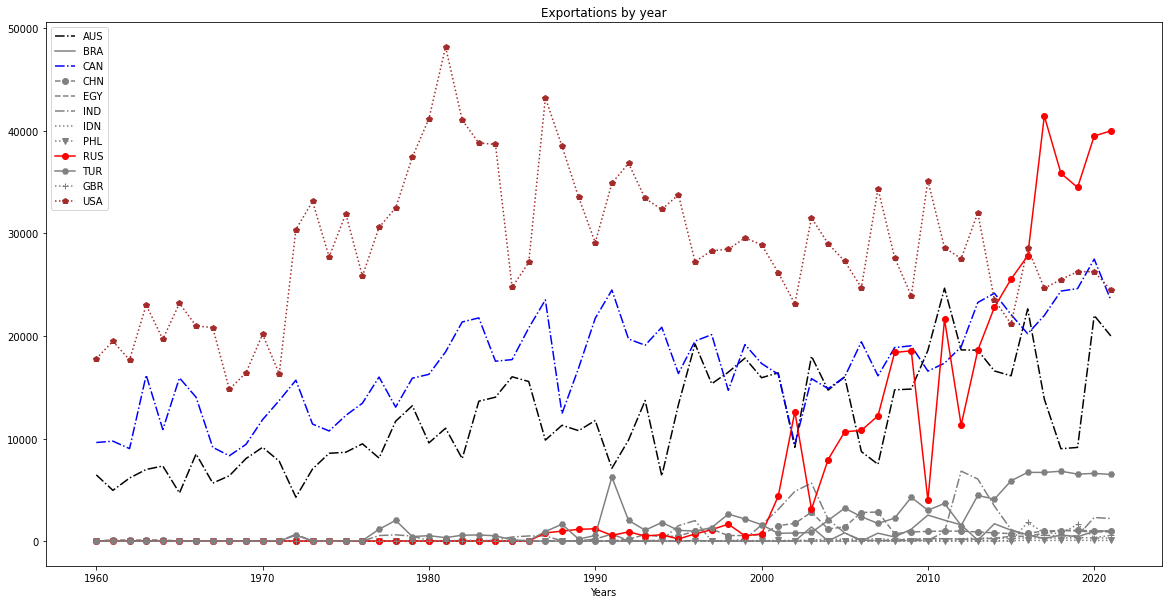

In [95]:

fig,ax = plt.subplots(figsize=(20,10))

df_countries_exportadores_iso3.plot.line(ax=ax, title="Exportations by year", style=['-.','-','-.','--o','--','-.',':',':v','-o','-H',':+',':p'], color=['black','gray','blue','gray','gray','gray','gray','gray','red','gray','gray','brown'])

fig.savefig(f"{path_to_charts}Exportations by year.png",dpi=300)


SAVING

In [96]:
path_analises_trigo = "/content/drive/MyDrive/Trigo_analises/notebooks/analises/"

In [97]:
tops_for_year_exportadores.to_csv(f"{path_analises_trigo}tops_year_exporter.csv")
last_for_years_exportadores.to_csv(f"{path_analises_trigo}last_placed_years_exporter.csv")

In [98]:
path_to_limpos_trigo ='/content/drive/MyDrive/Trigo_analises/limpos/'
df_countries_exportadores_iso3.to_csv(f"{path_to_limpos_trigo} wheat_exportation_countries.csv")